## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
## load file
df = pd.read_csv('ab_data.csv')

In [3]:
## check the brief information of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [4]:
## check the form of df: first a few rows
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [5]:
# the number of rows
len(df)

294478

c. The number of unique users in the dataset.

In [6]:
# the number of unique id
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [7]:
# the proportion of users converted
len(df.query('converted==1'))/len(df)

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [8]:
# the number of cases that the new_pages and treatment don't match
### group is treatment, but landing_page is not new_page
### group is not treatment, byt landing_page is new_page
len(df.query('group=="treatment"& landing_page!="new_page"'))+len(df.query('group!="treatment"& landing_page=="new_page"'))


3893

f. Do any of the rows have missing values?

In [9]:
# check whether any missing values have been contained in df or not
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [10]:
# filtering cases
### group==treatment and landing_page==new_page
### group==control and landing_page==old_page
df2 = df[((df['group']=="treatment") & (df['landing_page']=="new_page")) | (df['group']=="control") & (df['landing_page']=="old_page")]
### check the result
df2.head()


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
## the number of unique user_ids in df2
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
# check whether there are in df2 that user_ids have been duplicated

df2[df2['user_id'].duplicated()]['user_id']

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [14]:
## duplicated case: user_id==773192

df2.query("user_id == 773192")

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
## remove duplicated case

df2 = df2.drop_duplicates('user_id')

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
sum(df2['converted']==1)/len(df2)

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
sum(df2.query('group=="control"')['converted']==1)/len(df2.query('group=="control"'))

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
sum(df2.query('group=="treatment"')['converted']==1)/len(df2.query('group=="treatment"'))


0.11880806551510564

d. What is the probability that an individual received the new page?

In [19]:
len(df2.query('landing_page=="new_page"'))/len(df2)

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

 + **The probability that an individual received the new page is 0.50006, which means there is a similar chance that an received the old page, too.** <br><br>

 + **Also, the difference between the probability of control group and treatment group is very small, about 3rd decimal point.** <br><br>

 + **In this context, It seems like that there is insufficient evidence to conclude that the new treatment page leads to more conversions.** <br><br>

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

+ **Null hypothesis: The probability that the old page is better than the new page is equal or greater than the probability that the new page is better than the old page.**  <br>
  
   $H_{0}: p_{old} - p_{new} \geq 0$<br><br>
      
+ **Alternative hypothesis: The probability that the new page is better than the old page is greater than the probability that the old page is better than the new page.**  <br>
  
  $H_{A}: p_{old} - p_{new} < 0$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [20]:
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [21]:
p_old = df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [22]:
n_new = df2.query('group=="treatment"').count()[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [23]:
n_old = df2.query('group=="control"').count()[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [24]:
new_page_converted = np.random.choice([0,1],n_new,p=(1-p_new,p_new),replace=True)

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [25]:
old_page_converted = np.random.choice([0,1],n_old,p=(1-p_old,p_old),replace=True)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [26]:
new_page_converted.mean()-old_page_converted.mean()

8.0415485668602904e-05

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [27]:
## simulation
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.choice([0,1],n_new,p=(1-p_new,p_new),replace=True)
    old_page_converted = np.random.choice([0,1],n_old,p=(1-p_old,p_old),replace=True)
    p_diffs.append(new_page_converted.mean()-old_page_converted.mean())
## convert the type of p_diffs to np.array
p_diffs = np.array(p_diffs)
## check the result
print(p_diffs)

[  3.21010680e-05   1.17522862e-05  -2.02584501e-03 ...,   7.34551713e-04
   6.37830788e-04   1.00272173e-03]


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

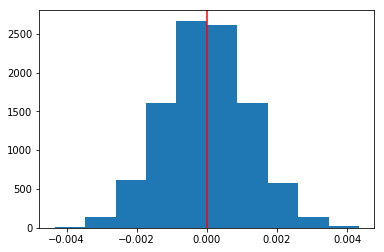

In [28]:
plt.hist(p_diffs)
plt.axvline(p_diffs.mean(), color='red')
plt.show()

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [29]:
act_diff = df2.query('group=="treatment"')['converted'].mean()-df2.query('group=="control"')['converted'].mean()
(p_diffs > act_diff).mean()

0.90300000000000002

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

 + **What we computed in part j is called p-value in scientific studies.**  <br><br>
 + **The p-value means the probability for statistic calculated using the sample data if the null hypothesis is true.** <br><br>
 + **Because the p-value in this case is too big, it is failed to reject the null hypothesis.** <br><br>

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [30]:
import statsmodels.api as sm

convert_old = df2.query('landing_page=="old_page"')['converted'].sum()
convert_new = df2.query('landing_page=="new_page"')['converted'].sum()
n_old = df2.query('landing_page=="old_page"')['user_id'].nunique()
n_new = df2.query('landing_page=="new_page"')['user_id'].nunique()

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [31]:
## z-test
sm.stats.proportions_ztest([convert_old, convert_new],[n_old,n_new],alternative="smaller")


(1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

 + **The z-score means how far the data point away from the mean in units of standard deviation.** <br><br>
 + **Because the z-score is positive value, the data point is greater than the mean.** <br><br>
 + **the p-value which is calculated using stats.proportions_ztest() is very similar to the p-value in part j.** <br><br>

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

 + **Because the outcome is dichotomous variable(e.g. conversion or not), The logistic regression could be used.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [32]:
## copy the df2: df2_logit
df2_logit = df2.copy()

In [33]:
df2_logit.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [34]:
## create intercept
df2_logit['intercept']=1
df2_logit.head()

,user_id,timestamp,group,landing_page,converted,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1


In [35]:
## create dummy variable: ab_page
## if the group is treatment, ab_page is 1
df2_logit['ab_page'] = pd.get_dummies(df2_logit['group'])['treatment']
df2_logit.head()


,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [36]:
## Logistic regression
mod_logit = sm.Logit(df2_logit['converted'],df2_logit[['intercept','ab_page']])
fit_logit = mod_logit.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [37]:
## summary2() : In my case, Because the summary() can't be executed, the summary2() is used.
print(fit_logit.summary2())

                          Results: Logit
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-04-18 18:19 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074



e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

 + **The p-value associated with `ab_page` is 0.1899, it seems like to different from the value in j of Part II.**  
 + **The p-value calculated in the part II was applied one-tailed p-value, but in the case of logistic regression, it was applied two-tailed p-value.**  
 + **Besides, the null and alternative hypotheses are somewhat different between the p-value in Part II and this case.** 
 + **In the logistic regression, the null hypothesis is that the coefficient of `ab_page` is not different from 0.**
 
 $H_{0}: \beta_{1}=0$  
 
 + **And the alternative hypothesis is that the coefficient of `ab_page` is different from 0.**
 
 $H_{A}: \beta_{1}\neq0$

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

 + **It is a good idea to consider other factors to add as inputs into the logistic regression model.** <br><br> 
 + **When we consider just `ab_page` as input variable to predict whether or not an individual converts, the performance of the logistic regression model could be seen as bad(e.g. Pseudo R-squared was closed to 0).**<br><br> 
 + **It might be think that some important features to predict an individual converts had not been used yet. So, other factors related to an individual converts could be add additionally.**<br><br> 
 + **But, there might be some disadvantages to adding additional inputs into the logistic regression model. For example, Adding additional inputs can lead to increase model complexity or cause overfitting.**<br><br> 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [38]:
df_con = pd.read_csv('countries.csv')
df_con.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [39]:
## Brief information about country data
df_con.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290584 entries, 0 to 290583
Data columns (total 2 columns):
user_id    290584 non-null int64
country    290584 non-null object
dtypes: int64(1), object(1)
memory usage: 4.4+ MB


In [40]:
## unique value of country feature
df_con['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [41]:
## inner join df2_logit and df_country
df2_logit2 = pd.merge(df2_logit, df_con, how='inner', left_on='user_id', right_on='user_id')
df2_logit2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [43]:
## create dummy variable: CA is the reference
df2_logit2[['UK','US']]=pd.get_dummies(df2_logit2['country'])[['UK','US']]
## check the result
df2_logit2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,1


In [46]:
## additional codes for resubmission: interaction terms
## interaction 1: group * UK
df2_logit2['UK_new']=df2_logit2['ab_page'] * df2_logit2['UK']
## interaction 2: group * US
df2_logit2['US_new']=df2_logit2['ab_page'] * df2_logit2['US']

df2_logit2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,UK,US,UK_new,US_new
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,1,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,1,0,0


In [47]:
## Logistic regression: add inputs
mod_logit2 = sm.Logit(df2_logit2['converted'],df2_logit2[['intercept','ab_page','UK','US','UK_new','US_new']])
fit_logit2 = mod_logit2.fit()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [48]:
fit_logit2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-04-18 18:23 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
ab_page       -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
UK             0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
US             0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
UK_new         0.0783    0.0568    1.3783  0.1681  -0.0330   0.1896
US_new         0.0469    0.0538    0.8718  0.3833  -0.0585   0.1523
==================================================================

"""

In [49]:
## convert probability 1: control group in CA
np.exp(fit_logit2.params[0])/(1+np.exp(fit_logit2.params[0]))

0.11878299527646571

In [50]:
## convert probability 2: treatment group in CA
xb=fit_logit2.params[0]+fit_logit2.params[1]
np.exp(xb)/(1+np.exp(xb))

0.11190247911244999

In [51]:
## convert probability 3: control group in UK
xb=fit_logit2.params[0]+fit_logit2.params[2]
np.exp(xb)/(1+np.exp(xb))

0.12002200220022002

In [55]:
## convert probability 4: treatment group in UK
xb=fit_logit2.params[0]+fit_logit2.params[1]+fit_logit2.params[2]+fit_logit2.params[4]
np.exp(xb)/(1+np.exp(xb))

0.12117099651027535

In [53]:
## convert probability 5: control group in US
xb=fit_logit2.params[0]+fit_logit2.params[3]
np.exp(xb)/(1+np.exp(xb))

0.12062998938220144

In [56]:
## convert probability 6: treatment group in US
xb=fit_logit2.params[0]+fit_logit2.params[1]+fit_logit2.params[3]+fit_logit2.params[5]
np.exp(xb)/(1+np.exp(xb))

0.11846559963887229

 + **As shown the summary of the logistic regression, There is no statistically significant effects. In other words, There are not significant differences for probabilities among groups and countries.**  <br><br>
 
 + **More specifically, the predicted probabilities by groups and countries are following:**<br><br>
   + **control group in CA: 11.6%** <br><br>
   + **treatment group in CA: 11.5%** <br><br>
   + **control group in UK: 12.1%** <br><br>
   + **treatment group in UK: 12.1%** <br><br>
   + **control group in US: 12.0%** <br><br>
   + **treatment group in US: 11.8%** <br><br>
   
 + **This result means that the probability of an individual converts is tend to similar whatever groups and countries.** <br><br><br><br>
   
 + **Note: Following reviews for the first submission, It was suggested that the probability about interaction terms should be added in this section. But, in my opinion, this section has been described about the predicted probabilities by groups and countries.** <br><br>
  
 + **Because there are 6 combinations by 2 groups and 3 countries, it should be described the predicted probabilities for 6 combinations.**<br><br> 
 
 + **For example, the logistic regression model is equal to equation (1),**
 
 $(1): \log(\frac{p}{1-p})=\beta_{0}+\beta_{1}x_{page}+\beta_{2}x_{UK}+\beta_{3}x_{US}+\beta_{4}x_{page}x_{UK}+\beta_{5}x_{page}x_{UK} $
 <br><br> 
 
 + **Then, the predicted probability for treatment groups in UK(`ab_page`=1 and `UK`=1, so `UK_new` =1) could be calculated like equation (2).** 
 
 $(2): log(\frac{p}{1-p})=\beta_{0}+\beta_{1}x_{page}+\beta{2}x_{UK}+\beta_{4}x_{page}x_{UK} $ <br><br> 
 
 + **Instead, it was revised the values that the predicted probabilities for 6 combinations.**<br><br><br><br>

 + **Because There is no statistical significant effects, the null hypothesis could not be rejected.**<br><br>
 
 + **As a result, It is not needed to apply new page, and it doesn't any problems if only the old page is used.**<br><br>

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [68]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0